# Titanic dataset

Before starting this notebook, it's important to first learn about <b>git</b> and <b>anaconda</b>.
<br>
Also it's important to have setup vscode.
<br>
necessary commands about git: clone, pull, push (beginner level)
<br>
anaconda: create, activate, deactivate 

This is a jupyter notebook, it allows you to run code and see the results in the same document. This is a great way to learn and experiment with code.
<br>
First, we will import what we call <b><a href="https://docs.python.org/3/library/index.html">libraries</a></b>, which are collections of functions and methods that allow us to perform many actions without having to write the code from scratch.
<br>
The first libraries we are going to use are: os (to interact with the operating system), and <a href="https://www.kaggle.com/">kaggle</a>, which is a library that allows us to download datasets from the kaggle platform.

In [1]:
import os # import os module/library

In [2]:
os.listdir(path=None)
# using path = None will list all files in the current working directory

['.gitignore', 'titanic', 'titanic.zip', 'notebook.ipynb']

In [3]:
# in python there are many different ways to call a function, the last function we called was os.listdir(path=None),
# we can also call it as os.listdir() or os.listdir(path=".")

In [4]:
os.listdir() # this will list all files in the current working directory
# because by default, the parameter "path" is set to None.

['.gitignore', 'titanic', 'titanic.zip', 'notebook.ipynb']

In [5]:
# the same can be achieved by using os.listdir(path=".")
os.listdir(path=".") # "." is the current working directory

['.gitignore', 'titanic', 'titanic.zip', 'notebook.ipynb']

In [6]:
# we can also call the function with os.listdir("."), python will understand that "." is given to the function as a 
# parameter and will use it as the path parameter. If this function could take more than one parameter, then python will
# pass to it in the same order as they are given in the function call. (this will be better understand later in the notebook)
print(os.listdir(None))
print(os.listdir("."))

['.gitignore', 'titanic', 'titanic.zip', 'notebook.ipynb']
['.gitignore', 'titanic', 'titanic.zip', 'notebook.ipynb']


In [7]:
# the "!" allow us to run shell commands from within the notebook
!pip install kaggle
# in this case, we are installing the kaggle package

In [8]:
# now getting the dataset we want:
# to do this, we need to go to kaggle.com, sign in, go to the dataset we want, and click on "copy API command"
# and also need to upload the kaggle.json file to where the website tutorial says to put it
# or where the error message says to put it
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


After the command above it's possible to check the downloaded files with the command <b>os.listdir()</b>

In [9]:
os.listdir()

['.gitignore', 'titanic', 'titanic.zip', 'notebook.ipynb']

with python it's even possible to open the zip file and see the files inside it.

In [10]:
from zipfile import ZipFile

In [11]:
# extract all the files from the zip file
# the with statement is commonly used to open a file and make sure it is closed after the block of code
# it means that the code already expects we to use it to handle files, if the code breaks or something bad happens, the file will be gracefully closed.

with ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('titanic') # without the 'titanic' string, it would just extract to the current working directory


In [12]:
# there's a new folder now, called 'titanic'
os.listdir()

['.gitignore', 'titanic', 'titanic.zip', 'notebook.ipynb']

In [13]:
# and the files inside it:
os.listdir('titanic')

['test.csv', 'gender_submission.csv', 'train.csv']

In [14]:
# now we can read the files
# using the pandas library. This is a common library for data manipulation.
import pandas as pd # import pandas imported the library, the "as pd" part is to give it a nickname,
# so we don't have to type "pandas" every time we want to use it
# pd is commonly used as the nickname for pandas

/tmp/ipykernel_19705/3081886747.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # import pandas imported the library, the "as pd" part is to give it a nickname,


In [15]:
# pandas can read multiple different files types, this is just one option:
df = pd.read_csv(filepath_or_buffer='titanic/train.csv')
# df is commonly used as the nickname for "dataframe", which is the name of the data structure that pandas uses to store data

In [16]:
# to better understand what each column means, read in the website: https://www.kaggle.com/c/titanic/data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
# with pandas we can do many operations, like getting the mean of a column
df['Age'].mean()

29.69911764705882

In [18]:
# or even agrouping the data by a column to get the mean of groups
df.groupby(by="Sex")["Age"].mean()
# this line of command: df is our pandas dataframe, that contains the "groupby" method, that groups the data by the 
# column given in the "by" parameter, and then we select the column we want to get the mean from, and then we call the
# "mean" method to get the mean of each group

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [19]:
# it's pretty customizable:
df.groupby(["Sex", "Survived"])["Age"].mean()

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [20]:
# we can also plot the data, using the seaborn library
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

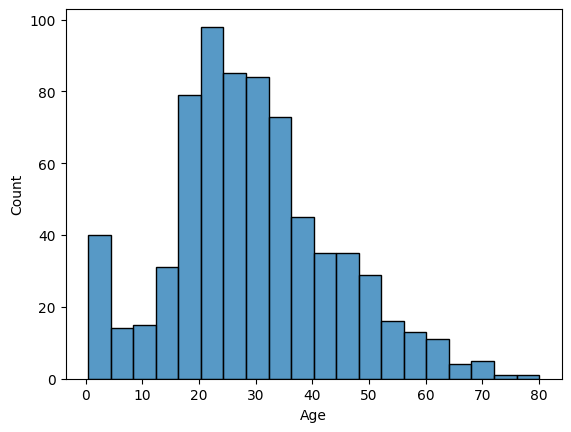

In [21]:
# histplot already has many default parameters, so we can just call it with the data we want to plot
sns.histplot(data=df, x="Age")

<Axes: xlabel='Age', ylabel='Count'>

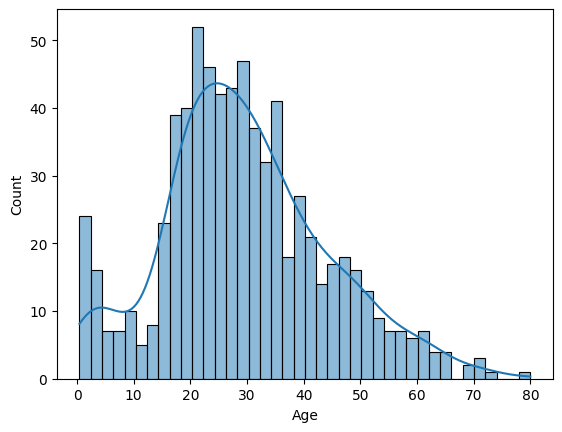

In [22]:
# it's highly customizable
sns.histplot(data=df, x="Age", bins=40, kde=True) # kde = kernel density estimation
# bins is the number of bars in the histogram


In [23]:
# in short: pandas to manipulate the data, seaborn/matplotlib to plot what we manipulated to understand it better
# in kaggle it's common to have many datasets, and there's normally a target variable, that we want to predict
# let's built a really quick and simple model to predict the "Survived" column, based only in the "Age" column
# we will use the sklearn library, that has many machine learning models already implemented
from sklearn.linear_model import LogisticRegression

In [24]:
# to do this, before we need to fill the missing values in the "Age" column
df['Age'].isna().sum() # this will give us the number of missing values in the "Age" column

177

In [25]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [26]:
df['Age'].isna().sum() 

0

In [27]:
lg = LogisticRegression()
lg.fit(df[["Age"]], df["Survived"])

LogisticRegression()

In [28]:
# we can also get the score of the model, this tell us how well the model is doing
lg.score(df[["Age"]], df["Survived"])
# with this result we can see that the model is not doing well, but this is expected, because we are using only one column to predict the target variable
# and we didn't even checked if the "Age" column is a good column to use to predict the "Survived" column.
# Also there are many other things necessary to do before we can actually use a model to guarantee it's results are good,
# like splitting the data into a training set and a test set.

0.6161616161616161